In [11]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [12]:
def read_and_plot_data(ticker):
    real = pd.read_csv(f"{ticker}_last_24.csv")
    pred = pd.read_csv(f"forecast_{ticker}.csv")

    max_val, min_val = real['Open'].tail(24).max(), real['Open'].tail(24).min()
    pred["Open"] = pred["Open"] * (max_val - min_val) + min_val

    off_by = real.iloc[0][0] - pred.iloc[0][0]
    pred["Open"] = pred["Open"] + off_by
   
    plt.plot(real.iloc[:, 0])  # Use .iloc to select the first column
    plt.plot(pred.iloc[:, 0])  # Use .iloc to select the first column
    plt.title(f"Prediction of Open Price {ticker}")
    plt.xlabel("Index")
    plt.ylabel("Values")
    plt.show()

    real_first_column = real.iloc[:, 0]
    pred_first_column = pred.iloc[:, 0]
    combined_max = max(real_first_column.max(), pred_first_column.max())
    combined_min = min(real_first_column.min(), pred_first_column.min())
    value_range = combined_max - combined_min

    # Compute the Mean Absolute Difference (MAD) and normalize it
    normalized_difference = (abs(real_first_column - pred_first_column).mean()) / value_range
    return normalized_difference

/var/folders/fz/6jqrkhfj6mj715w4gn4yjt080000gn/T/ipykernel_7278/2777465644.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  off_by = real.iloc[0][0] - pred.iloc[0][0]


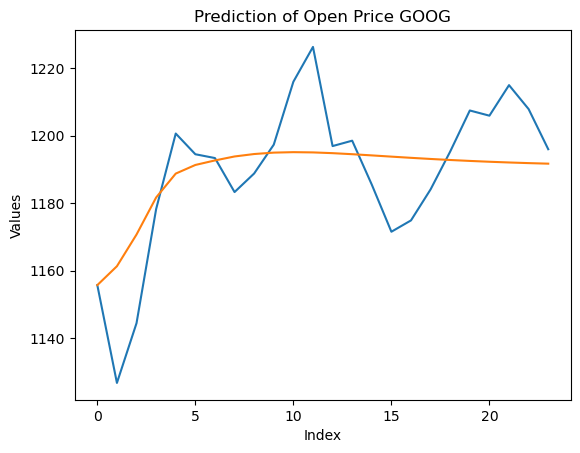

0.12124202782660802

In [13]:
read_and_plot_data("GOOG")

/var/folders/fz/6jqrkhfj6mj715w4gn4yjt080000gn/T/ipykernel_7278/2777465644.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  off_by = real.iloc[0][0] - pred.iloc[0][0]


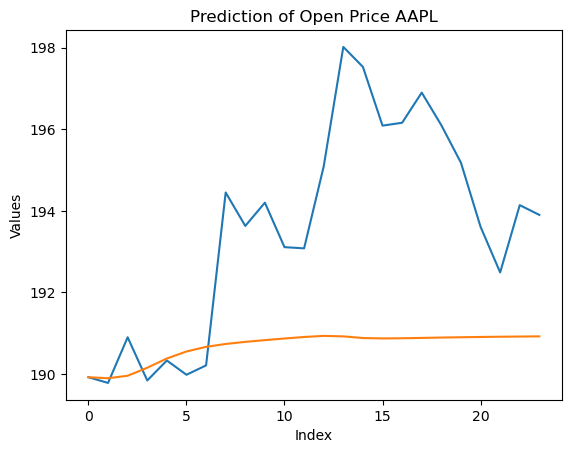

0.3599330499341009

In [14]:
read_and_plot_data("AAPL")

/var/folders/fz/6jqrkhfj6mj715w4gn4yjt080000gn/T/ipykernel_7278/2777465644.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  off_by = real.iloc[0][0] - pred.iloc[0][0]


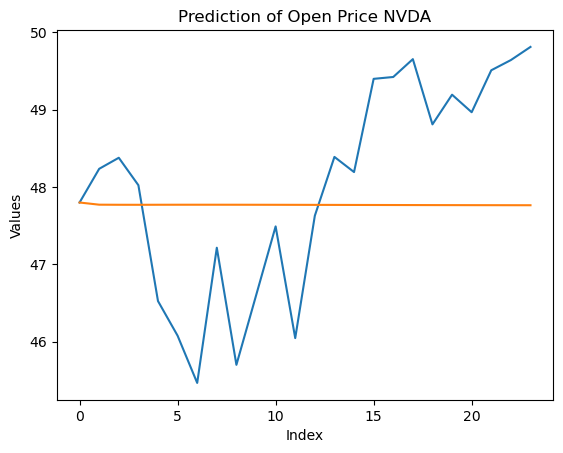

0.2692348369750474

In [15]:
read_and_plot_data("NVDA")